In [1]:
import importlib

import generate

# reload if generate.py has changed
importlib.reload(generate)

results = generate.generate()

Using key from OPENAI_API_KEY_PERSONAL environment variable
Generating m01_direct
  Temperature 0.0
    Trial 1 of 3
        attic table -> storage
        queen finger -> royalty
        pair chocolate -> fondue
        pilot hard -> cockpit
        dough skate -> rink
        queen diamond -> monarchy
        punch pair -> boxing
        mushroom summit -> toadstool
        genius punch -> Einstein
        truck ladder -> fireman
    Trial 2 of 3
        attic table -> furniture
        queen finger -> royalty
        pair chocolate -> fondue
        pilot hard -> cockpit
        dough skate -> rink
        queen diamond -> monarchy
        punch pair -> boxing
        mushroom summit -> toadstool
        genius punch -> smartforce
        truck ladder -> fireman
    Trial 3 of 3
        attic table -> storage
        queen finger -> royalty
        pair chocolate -> fondue
        pilot hard -> cockpit
        dough skate -> rink
        queen diamond -> monarchy
        punch pair 

Method, Temperature, 10%, 50%, 90%
m01_direct, 0.0, 1.00, 2.00, 3.10
m01_direct, 0.5, 1.00, 2.00, 4.00
m01_direct, 0.9, 1.00, 1.50, 4.00
m02_expert, 0.0, 1.00, 2.00, 4.00
m02_expert, 0.5, 1.00, 2.00, 4.00
m02_expert, 0.9, 1.00, 2.00, 4.00
m03_criteria, 0.0, 1.00, 2.00, 4.00
m03_criteria, 0.5, 1.00, 2.00, 3.10
m03_criteria, 0.9, 1.00, 2.00, 4.00
m04_examples, 0.0, 1.00, 2.00, 4.00
m04_examples, 0.5, 1.00, 2.00, 4.00
m04_examples, 0.9, 1.00, 2.00, 4.00
m05_expert_criteria_examples, 0.0, 1.00, 2.00, 4.00
m05_expert_criteria_examples, 0.5, 1.00, 1.00, 4.00
m05_expert_criteria_examples, 0.9, 1.00, 2.00, 4.00
m06_brainstorm, 0.0, 2.00, 3.00, 4.00
m06_brainstorm, 0.5, 2.00, 3.00, 4.00
m06_brainstorm, 0.9, 2.00, 3.00, 4.00


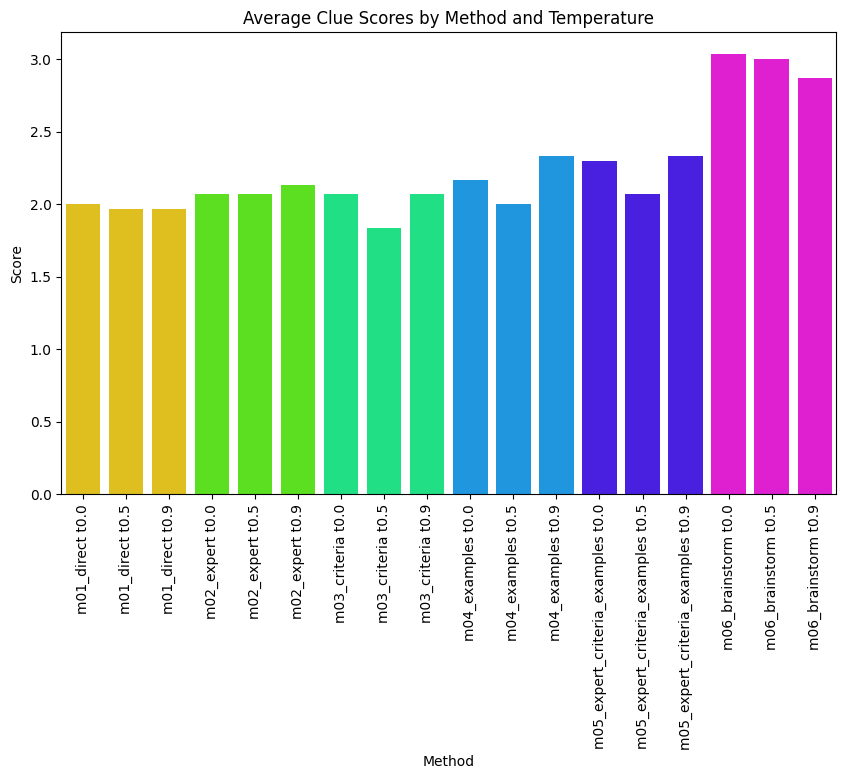

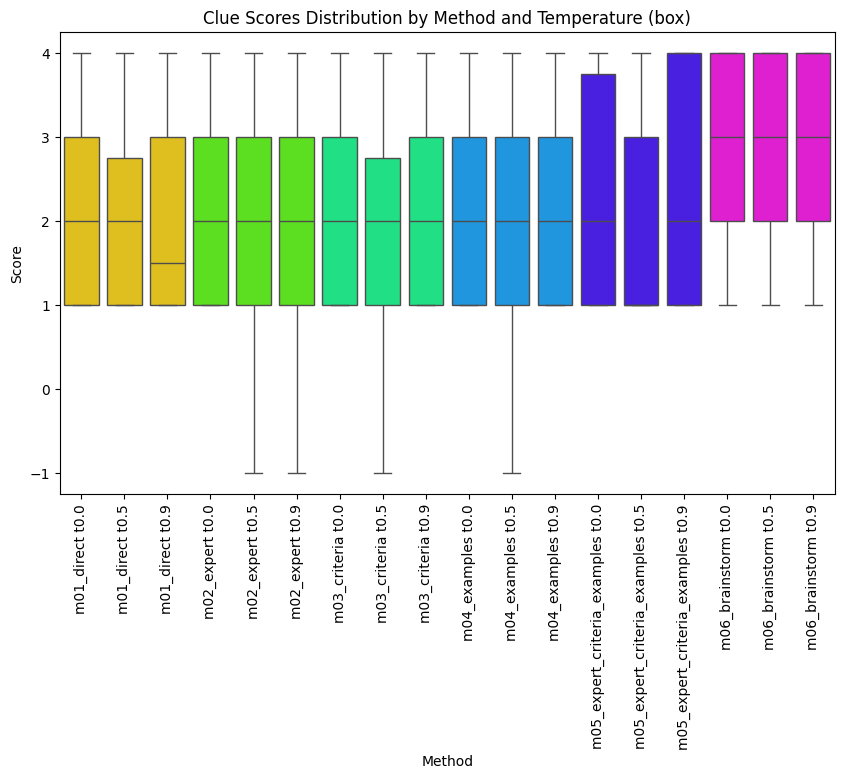

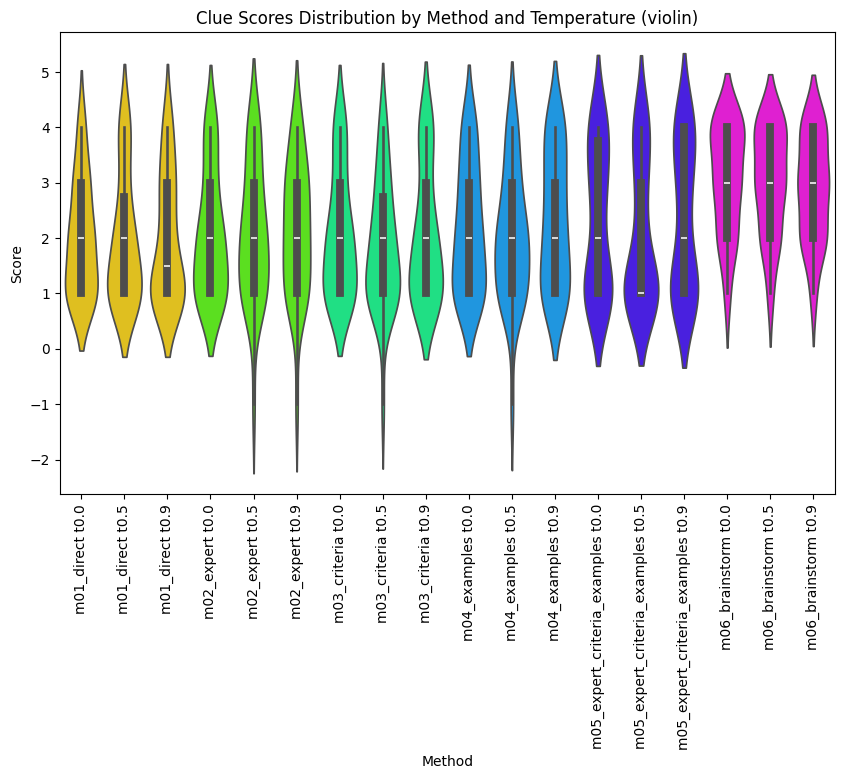

In [2]:
import evaluate

# reload if evaluate.py has changed
importlib.reload(evaluate)

evaluate.evaluate(results)